In [33]:
import pandas as pd
import numpy as np
import nltk
import csv
import textblob
import re
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [34]:
data = pd.read_csv(r'mo.csv',encoding='utf-8')
data

,Name der Klinik,ID,Sternbewertung,Datum der Bewertung,Likes,Textuelle Bewertung
0,Augenklinik Dr. Hoffmann,0,5 Sterne,vor einer Woche,Gefällt mir,Ich wurde sehr zuvorkommend behandelt und hatt...
1,Augenklinik Dr. Hoffmann,0,5 Sterne,vor 2 Monaten,Gefällt mir,Ich war bereits aufgrund von Notfällen in de...
2,Augenklinik Dr. Hoffmann,0,5 Sterne,vor 5 Tagen,Gefällt mir,Hier arbeiten Spezialisten. Super kompetent. A...
3,Augenklinik Dr. Hoffmann,0,5 Sterne,vor einem Monat,Gefällt mir,Ich wurde sehr zuvorkommend behandelt und hatt...
4,Augenklinik Dr. Hoffmann,0,5 Sterne,vor einer Woche,Gefällt mir,Zunächst erst einmal gibt es ein ganz tolles V...
...,...,...,...,...,...,...
1660,AMEOS Klinikum Alfeld,13,1 Stern,vor 2 Jahren,0,NaN
1661,AMEOS Klinikum Alfeld,13,1 Stern,vor 4 Jahren,0,NaN
1662,AMEOS Klinikum Alfeld,13,5 Sterne,vor einem Jahr,0,NaN
1663,AMEOS Klinikum Alfeld,13,4 Sterne,vor 5 Jahren,0,NaN


In [35]:
df = pd.DataFrame(data, columns=['ID', 'Name der Klinik', 'Sternbewertung', 'Datum der Bewertung', 'Likes', 'Textuelle Bewertung'])

df = df.fillna(0)
df


,ID,Name der Klinik,Sternbewertung,Datum der Bewertung,Likes,Textuelle Bewertung
0,0,Augenklinik Dr. Hoffmann,5 Sterne,vor einer Woche,Gefällt mir,Ich wurde sehr zuvorkommend behandelt und hatt...
1,0,Augenklinik Dr. Hoffmann,5 Sterne,vor 2 Monaten,Gefällt mir,Ich war bereits aufgrund von Notfällen in de...
2,0,Augenklinik Dr. Hoffmann,5 Sterne,vor 5 Tagen,Gefällt mir,Hier arbeiten Spezialisten. Super kompetent. A...
3,0,Augenklinik Dr. Hoffmann,5 Sterne,vor einem Monat,Gefällt mir,Ich wurde sehr zuvorkommend behandelt und hatt...
4,0,Augenklinik Dr. Hoffmann,5 Sterne,vor einer Woche,Gefällt mir,Zunächst erst einmal gibt es ein ganz tolles V...
...,...,...,...,...,...,...
1660,13,AMEOS Klinikum Alfeld,1 Stern,vor 2 Jahren,0,0
1661,13,AMEOS Klinikum Alfeld,1 Stern,vor 4 Jahren,0,0
1662,13,AMEOS Klinikum Alfeld,5 Sterne,vor einem Jahr,0,0
1663,13,AMEOS Klinikum Alfeld,4 Sterne,vor 5 Jahren,0,0


In [36]:

#dfn = df.convert_dtypes()
#df['ID'] = df['ID'].astype(str).astype(int)
df['Name der Klinik'] = df['Name der Klinik'].astype(str)
#df['ID'] = pd.to_numeric(df['ID'],errors='coerce').astype(int)
#df['ID'].dtypes
df['ID'] = df['ID'].astype(int)
df['ID'].dtypes

dtype('int32')

In [37]:
 df['Sternbewertung'] = df['Sternbewertung'].fillna(0)            
df['Sternbewertung'] = df['Sternbewertung'].str.replace('Sterne', '')
df['Sternbewertung'] = df['Sternbewertung'].str.replace('Stern', '')
#df['Sternbewertung'] = df['Sternbewertung'].str.replace(' ', '')
#df['Sternbewertung'] = df['Sternbewertung'].astype(int)
#df['Sternbewertung'] = df['Sternbewertung'].str[0]
df['Sternbewertung'] = df['Sternbewertung'].astype(int)
#df['Sternbewertung'] = pd.to_numeric(df['Sternbewertung'],errors='coerce').astype(int)
df

,ID,Name der Klinik,Sternbewertung,Datum der Bewertung,Likes,Textuelle Bewertung
0,0,Augenklinik Dr. Hoffmann,5,vor einer Woche,Gefällt mir,Ich wurde sehr zuvorkommend behandelt und hatt...
1,0,Augenklinik Dr. Hoffmann,5,vor 2 Monaten,Gefällt mir,Ich war bereits aufgrund von Notfällen in de...
2,0,Augenklinik Dr. Hoffmann,5,vor 5 Tagen,Gefällt mir,Hier arbeiten Spezialisten. Super kompetent. A...
3,0,Augenklinik Dr. Hoffmann,5,vor einem Monat,Gefällt mir,Ich wurde sehr zuvorkommend behandelt und hatt...
4,0,Augenklinik Dr. Hoffmann,5,vor einer Woche,Gefällt mir,Zunächst erst einmal gibt es ein ganz tolles V...
...,...,...,...,...,...,...
1660,13,AMEOS Klinikum Alfeld,1,vor 2 Jahren,0,0
1661,13,AMEOS Klinikum Alfeld,1,vor 4 Jahren,0,0
1662,13,AMEOS Klinikum Alfeld,5,vor einem Jahr,0,0
1663,13,AMEOS Klinikum Alfeld,4,vor 5 Jahren,0,0


In [38]:
# = df['subscriber_id'].isin([2,4,5])
stern_df = pd.DataFrame(df, columns= ['ID','Sternbewertung'])
#df.loc[df['ID'] == 0]
#selecting the kliniks by id
k1 = stern_df.loc[df['ID'] == 0].iloc[:,1]
k2 = stern_df.loc[df['ID'] == 1].iloc[:,1]
k3 = stern_df.loc[df['ID'] == 2].iloc[:,1]
k4 = stern_df.loc[df['ID'] == 3].iloc[:,1]
k5 = stern_df.loc[df['ID'] == 4].iloc[:,1]
k6 = stern_df.loc[df['ID'] == 5].iloc[:,1]
k7 = stern_df.loc[df['ID'] == 6].iloc[:,1]
k8 = stern_df.loc[df['ID'] == 7].iloc[:,1]
k9 = stern_df.loc[df['ID'] == 8].iloc[:,1]
k10 = stern_df.loc[df['ID'] == 9].iloc[:,1]
k11 = stern_df.loc[df['ID'] == 10].iloc[:,1]
k12 = stern_df.loc[df['ID'] == 11].iloc[:,1]
k13 = stern_df.loc[df['ID'] == 12].iloc[:,1]
k14 = stern_df.loc[df['ID'] == 13].iloc[:,1]
#counting the average
star_average = []
kliniken_mean =[k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14]
for i in kliniken_mean:
    star_average.append(i.mean())
star_average

[4.37037037037037,
 3.8735632183908044,
 4.204225352112676,
 3.0892857142857144,
 3.56,
 3.132575757575758,
 3.7938144329896906,
 4.145251396648045,
 3.8793103448275863,
 3.1785714285714284,
 3.264367816091954,
 2.727272727272727,
 2.4551971326164876,
 2.739130434782609]

In [39]:
kliniken_namen = df['Name der Klinik'].unique()
kliniken_ids = df['ID'].unique()
df_mean = pd.DataFrame({'ID':kliniken_ids, 'Name der Klinik':kliniken_namen})
df_mean['Average rating'] = star_average
df_mean

,ID,Name der Klinik,Average rating
0,0,Augenklinik Dr. Hoffmann,4.370370
1,1,Krankenhaus Marienstift gGmbH,3.873563
2,2,Herzogin Elisabeth Hospital,4.204225
3,3,Asklepios Fachklinikum Göttingen,3.089286
4,4,Asklepios Fachklinikum Tiefenbrunn,3.560000
5,5,DIAKOVERE Friederikenstift,3.132576
6,6,DIAKOVERE Annastift,3.793814
7,7,DRK-Krankenhaus Clementinenhaus,4.145251
8,8,Sophienklinik GmbH,3.879310
9,9,KRH Klinikum Großburgwedel,3.178571


<AxesSubplot:xlabel='Name der Klinik'>

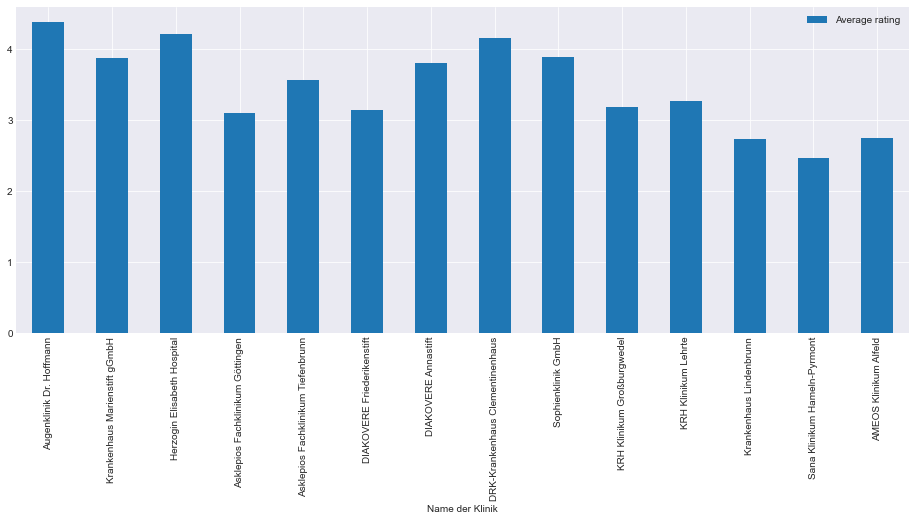

In [40]:
plt.rcParams['figure.figsize'] = (16,6)
df_mean.plot.bar(x='Name der Klinik',y='Average rating')

In [24]:
import matplotlib 
matplotlib.style.use('seaborn-darkgrid')

In [27]:
matplotlib.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']